In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


**Attribute Information:**

ID number
Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)
b) texture (standard deviation of gray-scale values)
c) perimeter
d) area
e) smoothness (local variation in radius lengths)
f) compactness (perimeter^2 / area - 1.0)
g) concavity (severity of concave portions of the contour)
h) concave points (number of concave portions of the contour)
i) symmetry
j) fractal dimension ("coastline approximation" - 1)

The mean, standard error, and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

 i will drop Unamed:32 column as it has no values

In [4]:
df.drop(['Unnamed: 32','id'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [5]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

<Axes: xlabel='diagnosis', ylabel='count'>

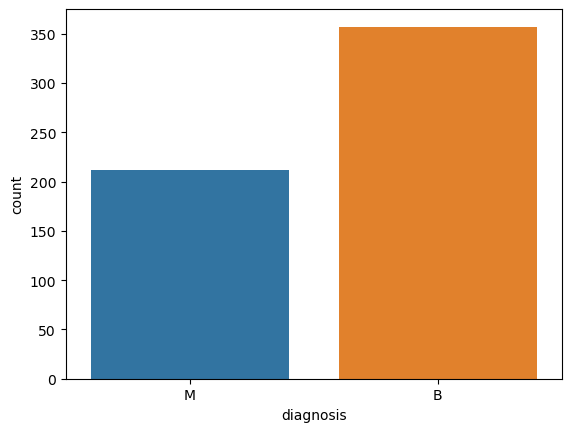

In [6]:
sns.countplot(x='diagnosis',data=df)

In [7]:
df.diagnosis.replace({'M':1,'B':0},inplace=True)

In [8]:
df.diagnosis.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

### modeling

In [9]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,ConfusionMatrixDisplay


In [10]:
from sklearn.model_selection import train_test_split
x=df.drop(['diagnosis'],axis=1)
y=df.diagnosis

In [11]:
#spliting data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=40)


In [12]:
from sklearn.preprocessing import StandardScaler
s= StandardScaler()
x_train=s.fit_transform(x_train)
x_test=s.fit_transform(x_test)

In [13]:
from sklearn.linear_model import LogisticRegression
log= LogisticRegression()
log.fit(x_train,y_train)
y_pre=log.predict(x_test)

confusion matrix


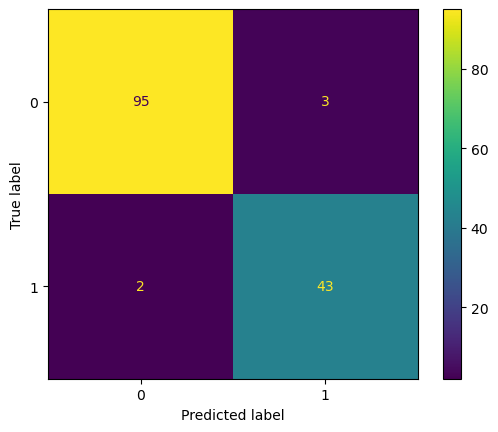

In [14]:
# confusion matrix without normalization
print('confusion matrix')
cm = confusion_matrix(y_test, y_pre, labels=log.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=log.classes_)
disp.plot()

normalized confusion matrix


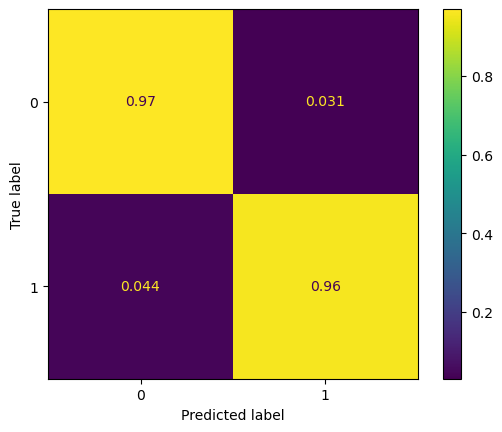

In [15]:
# confusion matrix without normalization
print('normalized confusion matrix')
cm = confusion_matrix(y_test, y_pre,normalize='true', labels=log.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=log.classes_)
disp.plot()

In [16]:
print(confusion_matrix(y_test,y_pre))
print(classification_report(y_test,y_pre))
print(accuracy_score(y_test,y_pre))


[[95  3]
 [ 2 43]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        98
           1       0.93      0.96      0.95        45

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.97       143

0.965034965034965


In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=3)

knn.fit(x_train,y_train)

knn_pre=knn.predict(x_test)

confusion matrix


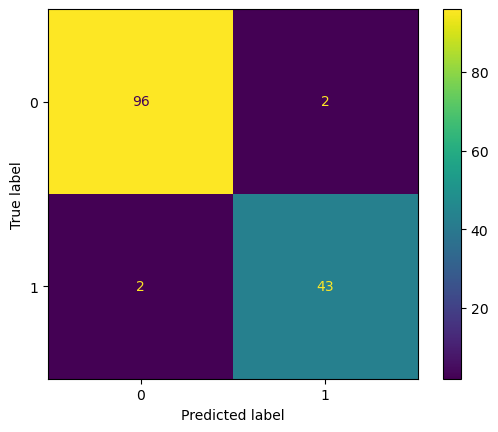

In [18]:
# confusion matrix without normalization
print('confusion matrix')
cm = confusion_matrix(y_test, knn_pre, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=knn.classes_)
disp.plot()

normalized confusion matrix


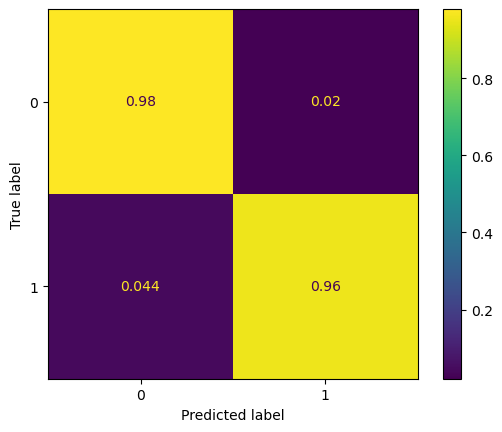

In [19]:
# confusion matrix without normalization
print('normalized confusion matrix')
cm = confusion_matrix(y_test, knn_pre,normalize='true', labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=knn.classes_)
disp.plot()

In [20]:
print(confusion_matrix(y_test,knn_pre))
print(classification_report(y_test,knn_pre))
print(accuracy_score(y_test,knn_pre))


[[96  2]
 [ 2 43]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        98
           1       0.96      0.96      0.96        45

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143

0.972027972027972


In [21]:
from sklearn.ensemble import RandomForestClassifier

rn= RandomForestClassifier(n_estimators=100,random_state=0)

rn.fit(x_train,y_train)

rn_pre=rn.predict(x_test)

confusion matrix


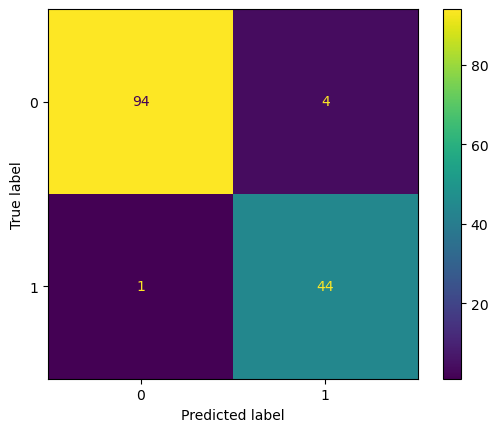

In [22]:
# confusion matrix without normalization
print('confusion matrix')
cm = confusion_matrix(y_test, rn_pre, labels=rn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rn.classes_)
disp.plot()

In [24]:
print(confusion_matrix(y_test,rn_pre))
print(classification_report(y_test,rn_pre))
print(accuracy_score(y_test,rn_pre))

[[94  4]
 [ 1 44]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.97        98
           1       0.92      0.98      0.95        45

    accuracy                           0.97       143
   macro avg       0.95      0.97      0.96       143
weighted avg       0.97      0.97      0.97       143

0.965034965034965


In [25]:
from sklearn.tree import DecisionTreeClassifier

dt= DecisionTreeClassifier(random_state=42)

dt.fit(x_train,y_train)

dt_pre=rn.predict(x_test)

confusion matrix


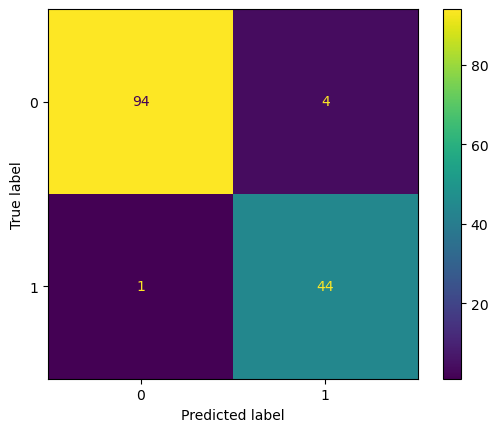

In [26]:
# confusion matrix without normalization
print('confusion matrix')
cm = confusion_matrix(y_test, dt_pre, labels=dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=dt.classes_)
disp.plot()

normalized confusion matrix


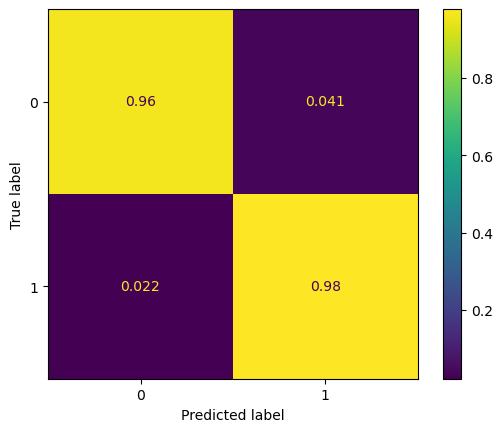

In [27]:
# confusion matrix without normalization
print('normalized confusion matrix')
cm = confusion_matrix(y_test, dt_pre,normalize='true', labels=rn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rn.classes_)
disp.plot()

In [28]:
print(confusion_matrix(y_test,dt_pre))
print(classification_report(y_test,dt_pre))
print(accuracy_score(y_test,dt_pre))

[[94  4]
 [ 1 44]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.97        98
           1       0.92      0.98      0.95        45

    accuracy                           0.97       143
   macro avg       0.95      0.97      0.96       143
weighted avg       0.97      0.97      0.97       143

0.965034965034965


In [29]:
from sklearn.naive_bayes import GaussianNB

gn= GaussianNB()

gn.fit(x_train,y_train)

gn_pre=gn.predict(x_test)

confusion matrix


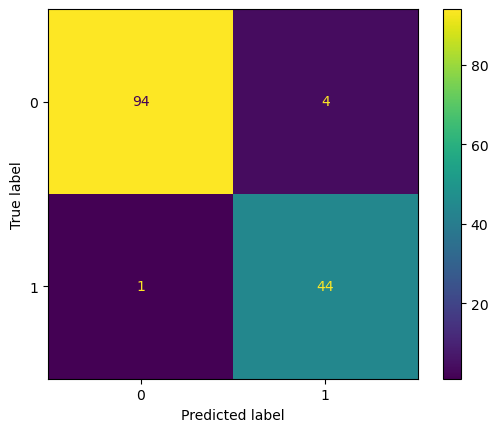

In [30]:
# confusion matrix with normalization
print('confusion matrix')
cm = confusion_matrix(y_test, gn_pre, labels=gn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=gn.classes_)
disp.plot()

normalized confusion matrix


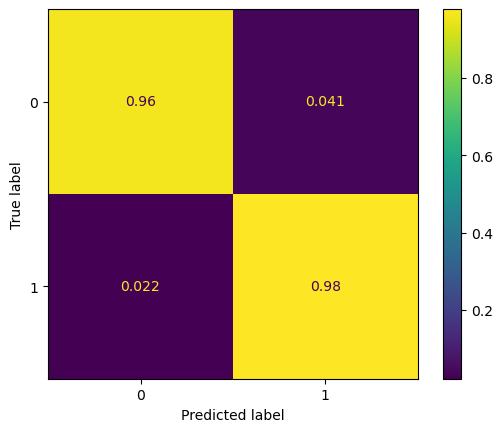

In [31]:
# confusion matrix without normalization
print('normalized confusion matrix')
cm = confusion_matrix(y_test, gn_pre,normalize='true', labels=gn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=gn.classes_)
disp.plot()

In [32]:
print(confusion_matrix(y_test,gn_pre))
print(classification_report(y_test,gn_pre))
print(accuracy_score(y_test,gn_pre))

[[94  4]
 [ 1 44]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.97        98
           1       0.92      0.98      0.95        45

    accuracy                           0.97       143
   macro avg       0.95      0.97      0.96       143
weighted avg       0.97      0.97      0.97       143

0.965034965034965
